# Classification

In [1]:
import seaborn as sns

## Load the Data Set

In [2]:
iris=sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Separate Features and Labels

In [3]:
x=iris.drop('species',axis=1)
y=iris['species']

## Splitting into training and testing data

In [4]:
from sklearn.model_selection import train_test_split as tts

In [5]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.2,stratify=y,shuffle=True,
                              random_state=10)

## Define the Model using decision tree classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [9]:
clf=DecisionTreeClassifier(criterion='entropy')

In [10]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.7\nentropy = 1.585\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.511\nsamples = 44\nvalue = [0, 39, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.176\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0

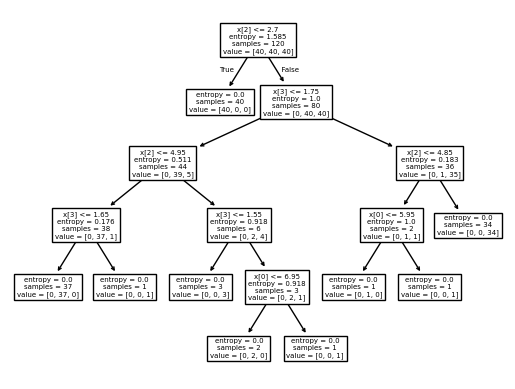

In [12]:
from sklearn import tree
tree.plot_tree(clf)

## Evaluation

In [13]:
ypred=clf.predict(xtest)

In [11]:
from sklearn import metrics as mat

In [15]:
print(mat.classification_report(ytest,ypred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Prediction on unseen Data

In [32]:
clf.predict([[5.1,3.5,1.4,0.2]])

C:\Users\CDAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

# Regression

In [17]:
import pandas as pd
mark=pd.read_csv('score_updated.csv')

## Dividing into x and y

In [18]:
mark.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
x1=mark[['Hours']]
y1=mark['Scores']

## Splitting into train and test dataset

In [34]:
xtrain1,xtest1,ytrain1,ytest1=tts(x1,y1,test_size=0.2)

## Define the Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()

In [23]:
lr.fit(xtrain1,ytrain1)

LinearRegression()

## Visualization of model

In [24]:
import matplotlib.pyplot as plt
import numpy as np

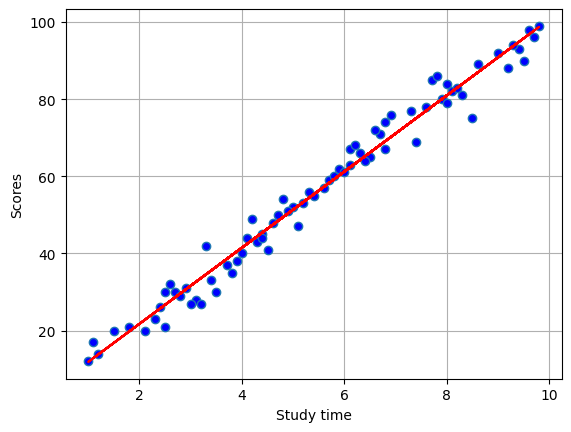

In [29]:
plt.plot(xtrain1,ytrain1,'o',mfc='b')
plt.plot(xtrain1,lr.predict(xtrain1),c='r')
plt.xlabel('Study time')
plt.ylabel('Scores')
plt.grid(True)

## Evaluation of Model

In [30]:
ypred1=lr.predict(xtest1)

In [31]:
print('R2 Score:',mat.r2_score(ytest1,ypred1))
print('MAE Score:',mat.mean_absolute_error(ytest1,ypred1))
print('MSE Score:',mat.mean_squared_error(ytest1,ypred1))

R2 Score: 0.9895685962357943
MAE Score: 2.3066565002560417
MSE Score: 7.6581889949821855


## Prediction on unseen Data

In [33]:
lr.predict([[8.5]])

C:\Users\CDAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([85.92484984])

# Clustering

In [6]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [9]:
kmeans.fit(x)

C:\Users\CDAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\CDAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=3, random_state=42)

In [10]:
labels = kmeans.labels_

In [17]:
labels 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['label']=le.fit_transform(iris['species'])

In [15]:
cm=mat.confusion_matrix(iris['label'],labels)

<Axes: >

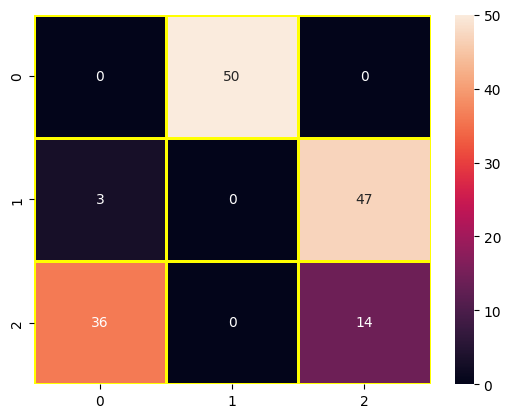

In [16]:
sns.heatmap(cm,annot=True,linewidths=2,linecolor='yellow')